In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [24]:
try:
    data = pd.read_csv('bank.csv', sep=';')  # Ensure this CSV is in the same folder
except FileNotFoundError:
    print("Dataset file 'bank.csv' not found. Please download it from UCI ML Repository:")
    print("https://archive.ics.uci.edu/ml/datasets/bank+marketing")
    exit()

print("✅ Dataset Loaded Successfully")
print("Shape:", data.shape)
print("\nSample Data:\n", data.head())


✅ Dataset Loaded Successfully
Shape: (4521, 17)

Sample Data:
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [15]:
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 3: Split features and target
X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = DecisionTreeClassifier(random_state=42, max_depth=6)  # limit depth for better visualization
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [17]:
y_pred = model.predict(X_test)



 Accuracy: 0.9049723756906077

 Confusion Matrix:
 [[784  23]
 [ 63  35]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.60      0.36      0.45        98

    accuracy                           0.90       905
   macro avg       0.76      0.66      0.70       905
weighted avg       0.89      0.90      0.89       905



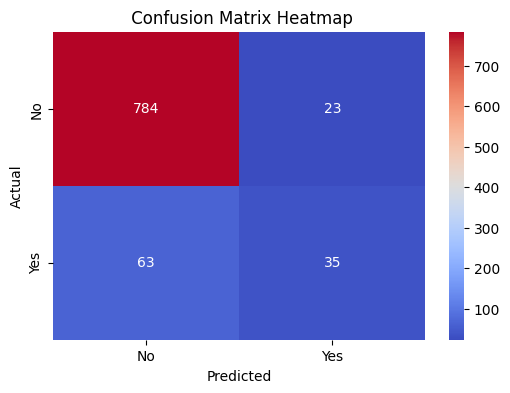

In [18]:
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# === Visualization 1: Confusion Matrix Heatmap ===
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm",
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title(" Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


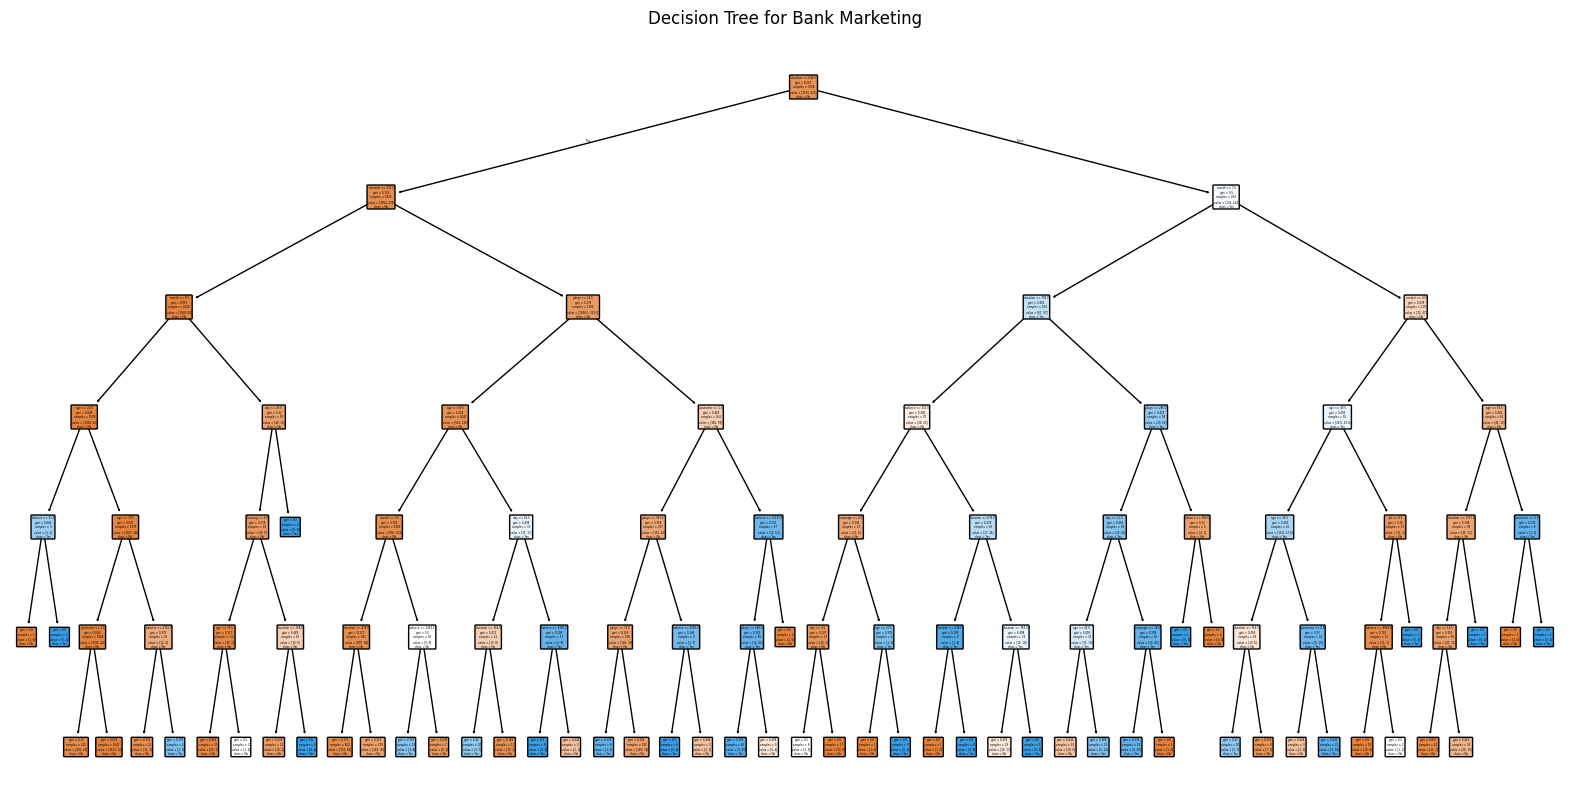

In [19]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree for Bank Marketing")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_488\3045535748.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


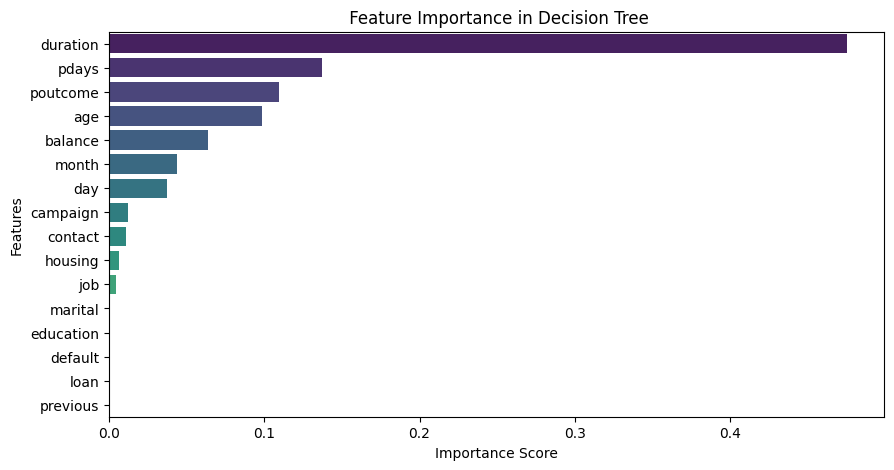

In [23]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title(" Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


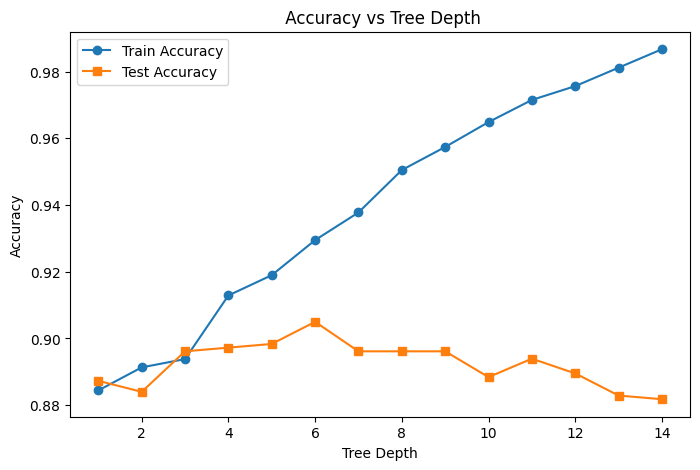

In [22]:
depths = range(1, 15)
train_acc, test_acc = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, marker="o", label="Train Accuracy")
plt.plot(depths, test_acc, marker="s", label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title(" Accuracy vs Tree Depth")
plt.legend()
plt.show()